In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

loading the dataset

In [ ]:
data = pd.read_csv('laptopPrice.csv')

In [ ]:
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


im gonna check the missing values

In [ ]:
data.isnull().sum()

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


In [ ]:
data.duplicated().sum()

np.int64(21)

In [ ]:

data.drop_duplicates(inplace=True)
data.duplicated().sum()


np.int64(0)

encoding categorical features

In [ ]:
for col in data.select_dtypes(include='object').columns:
  data[col] = LabelEncoder().fit_transform(data[col])

separating the features and target variable

In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

standardizng features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

spliting data into the training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hyperpaarameter tuning

In [ ]:
param_dist = {'C': np.logspace(-2, 2, 5), 'epsilon': np.logspace(-3, 0, 4), 'kernel': ['rbf', 'linear']}
random_search = RandomizedSearchCV(SVR(), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
svm_regressor = random_search.best_estimator_

making predictions

In [ ]:
y_pred = svm_regressor.predict(X_test)

evaluations

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", svm_regressor.score(X_test, y_test))
print("Best Parameters:", random_search.best_params_)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1231680068.2277708
R^2 Score: 0.42100375036290816
Best Parameters: {'kernel': 'linear', 'epsilon': np.float64(0.001), 'C': np.float64(100.0)}
Root Mean Squared Error: 35095.2998025059


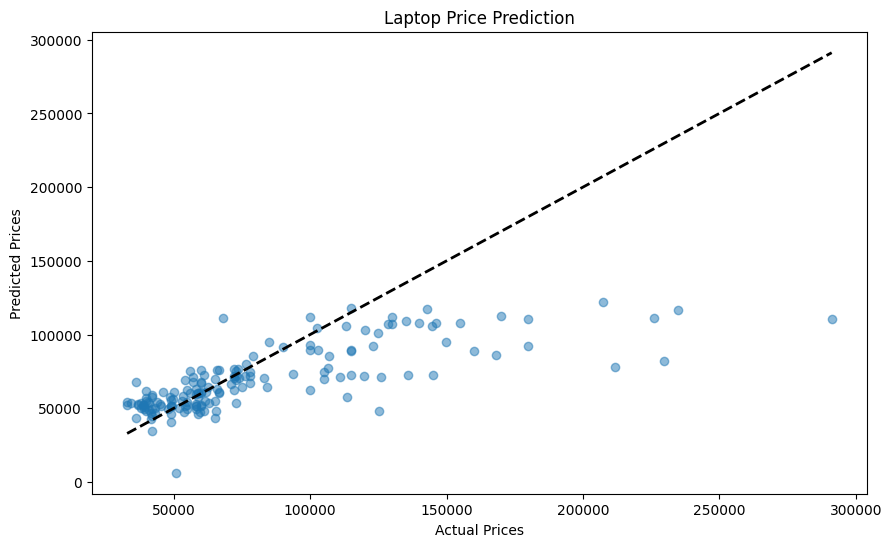

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Laptop Price Prediction')
plt.show()